In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [2]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
import numpy as np
import pandas as pd

# load the data using pandas with a function
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [6]:
print(float(20640-20433))
# There are 207 missing values in 'total_bedrooms' feature 

207.0


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# Let's convert ocean proximity from string categorical to numeric
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.where(housing.ocean_proximity == 'INLAND').dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
954,-121.92,37.64,46.0,1280.0,209.0,512.0,208.0,5.1406,315600.0,INLAND
957,-121.90,37.66,18.0,7397.0,1137.0,3126.0,1115.0,6.4994,323000.0,INLAND
965,-121.88,37.68,23.0,2234.0,270.0,854.0,286.0,7.3330,337200.0,INLAND
967,-121.88,37.67,16.0,4070.0,624.0,1543.0,577.0,6.5214,311500.0,INLAND
968,-121.88,37.67,25.0,2244.0,301.0,937.0,324.0,6.4524,296900.0,INLAND
969,-121.89,37.67,20.0,2948.0,471.0,1181.0,474.0,6.0604,247900.0,INLAND
970,-121.89,37.67,19.0,2034.0,288.0,852.0,295.0,6.5285,300400.0,INLAND
973,-121.88,37.66,29.0,2702.0,680.0,1360.0,642.0,3.1127,233000.0,INLAND
974,-121.87,37.66,39.0,522.0,116.0,161.0,102.0,2.4896,238500.0,INLAND
975,-121.87,37.66,52.0,775.0,134.0,315.0,123.0,5.0677,233300.0,INLAND


In [10]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline 
rcParams['figure.figsize'] = 5, 4

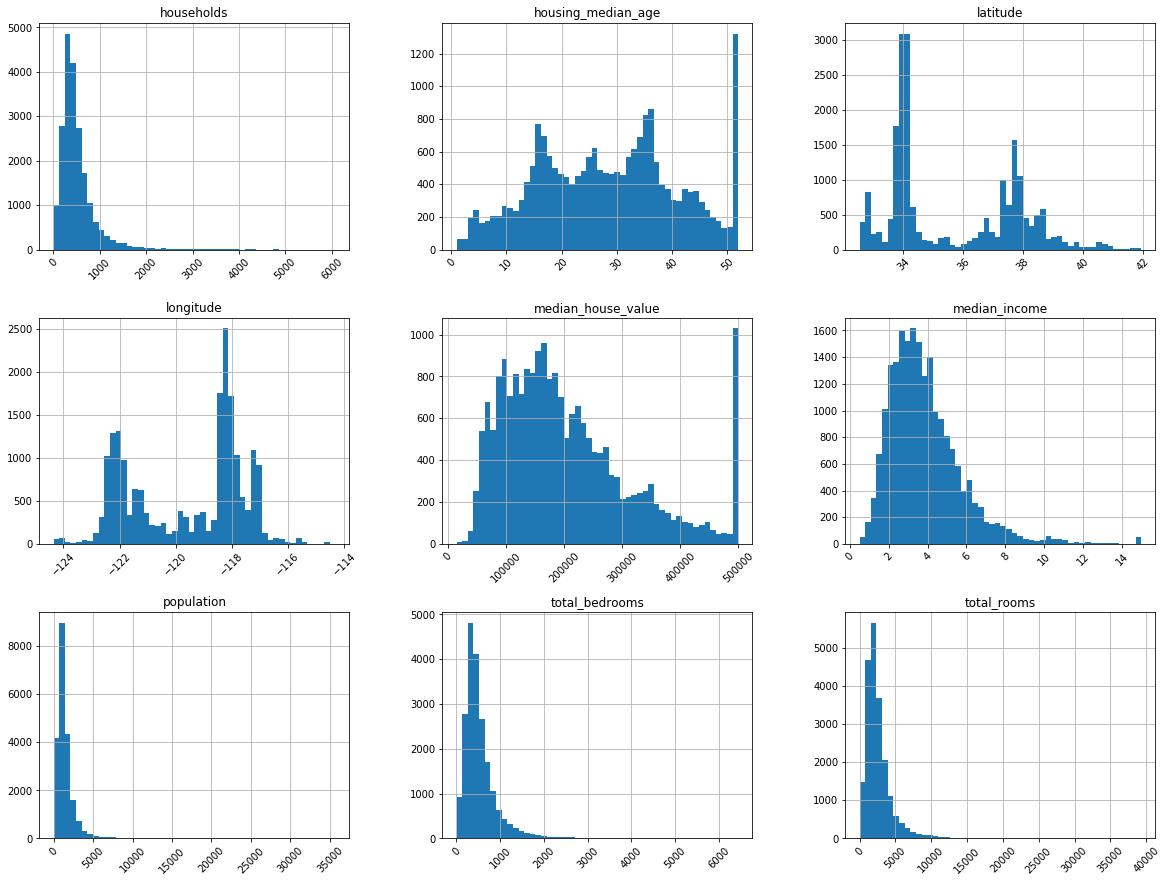

In [11]:
housing.hist(bins=50, figsize = (20, 15), xrot=45)
plt.show()

In [12]:
# Note: many of these histograms are tail-heavy, which may make it harder for ML algorithms to detect patterns. We shall attempt
# to create more bell shaped distributions to alleviate this problem

# Note: All the values in these histograms are scaled.

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
housing.where(housing.ocean_proximity == '<1H OCEAN').describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,9136.000000,9136.000000,9136.000000,9136.000000,9034.000000,9136.000000,9136.000000,9136.000000,9136.000000
mean,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
std,1.588888,1.467127,11.644453,2160.463696,427.911417,1185.848357,392.280718,2.001223,106124.292213
min,-124.140000,32.610000,2.000000,11.000000,5.000000,3.000000,4.000000,0.499900,17500.000000
25%,-118.500000,33.860000,20.000000,1464.000000,303.000000,857.750000,293.000000,2.864900,164100.000000
50%,-118.275000,34.030000,30.000000,2108.000000,438.000000,1247.000000,421.000000,3.875000,214850.000000
75%,-118.000000,34.220000,37.000000,3141.000000,652.000000,1848.000000,617.000000,5.180500,289100.000000
max,-116.620000,41.880000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
housing.where(housing.ocean_proximity == 'ISLAND').describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000
mean,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.74442,380440.000000
std,0.070569,0.040866,13.164346,707.545264,169.320111,301.691067,113.200265,0.44418,80559.561816
min,-118.480000,33.330000,27.000000,716.000000,214.000000,341.000000,160.000000,2.15790,287500.000000
25%,-118.330000,33.340000,29.000000,996.000000,264.000000,422.000000,173.000000,2.60420,300000.000000
50%,-118.320000,33.340000,52.000000,1675.000000,512.000000,733.000000,288.000000,2.73610,414700.000000
75%,-118.320000,33.350000,52.000000,2127.000000,521.000000,744.000000,331.000000,2.83330,450000.000000
max,-118.320000,33.430000,52.000000,2359.000000,591.000000,1100.000000,431.000000,3.39060,450000.000000


In [15]:
proxy_map = {'<1H OCEAN' : 1,
             'INLAND': 2,
             'NEAR OCEAN': 3,
             'NEAR BAY': 4,
             'ISLAND': 5,
             None: 6
            }
housing.ocean_proximity = housing.ocean_proximity.map(proxy_map)

In [16]:
housing.ocean_proximity.value_counts()

1    9136
2    6551
3    2658
4    2290
5       5
Name: ocean_proximity, dtype: int64

In [17]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4


In [18]:
# Given : The data was capped at $500,000, which is why we see a spike in values over 500000. May later eliminate values 
# so that it does not affect our model's predictions 

In [19]:
# Split into test and train sets
from sklearn.model_selection import train_test_split

traindf, testdf = train_test_split(housing, test_size=0.2, random_state=42)
traindf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,3
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,3
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,3
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,3
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,2


In [48]:
# To avoid a sampling bias with a skewed set, we try stratified sampling instead. 
# Since median income is a very important attribute to predict median house prices, we want to ensure that the test set is 
# representative of the various categories of incomes in the whole dataset

# So lets create an income category attribute: -
housing['income_cat'] = np.ceil(housing.median_income / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

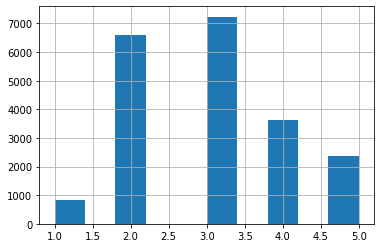

In [49]:
housing.income_cat.hist(bins=10)

In [50]:
housing.income_cat.value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: median_income, dtype: float64

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for idx_tr, idx_te in split.split(housing, housing['income_cat']):
    strat_train = housing.loc[idx_tr]
    strat_test = housing.loc[idx_te]
    
traindf['income_cat'] = np.ceil(traindf.median_income / 1.5)
traindf['income_cat'].where(traindf['income_cat'] < 5, 5.0, inplace=True)

#strat_train['income_cat'] = np.ceil(strat_train.median_income / 1.5)
#strat_train['income_cat'].where(strat_train.income_cat < 5, 5.0, inplace=True)

print (housing.income_cat.value_counts() / len(housing), "\n", 
      traindf.income_cat.value_counts() / len(housing), "\n",
      strat_train.income_cat.value_counts() / len(housing))
# StratifiedSplit is minutely better than normal test split

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: median_income, dtype: float64 
 3.0    0.278876
2.0    0.253973
4.0    0.142829
5.0    0.092539
1.0    0.031783
Name: median_income, dtype: float64 
 3.0    0.280475
2.0    0.255087
4.0    0.141037
5.0    0.091521
1.0    0.031880
Name: income_cat, dtype: float64


C:\Users\harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\harsh\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [44]:
#housing.drop('income_cat', axis=1, inplace=True)
#strat_train.drop(['income_cat'], axis=1, inplace=True)
#strat_test.drop(['income_cat'], axis=1, inplace=True)
strat_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [52]:
st_train, st_test = train_test_split(housing, stratify=housing['income_cat'], test_size = 0.2, random_state=42)

In [53]:
print (housing.income_cat.value_counts() / len(housing), "\n", 
      traindf.income_cat.value_counts() / len(housing), "\n",
      st_train.income_cat.value_counts() / len(housing))

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: median_income, dtype: float64 
 3.0    0.278876
2.0    0.253973
4.0    0.142829
5.0    0.092539
1.0    0.031783
Name: median_income, dtype: float64 
 3.0    0.280475
2.0    0.255087
4.0    0.141037
5.0    0.091521
1.0    0.031880
Name: income_cat, dtype: float64


In [56]:
export_csv1 = st_train.to_csv (r'C:\Users\harsh\Desktop\Summer Projects\MachineLearning\california_housing\datasets\housing\st_train.csv',
                              index = None, header=True) 
export_csv2 = st_test.to_csv (r'C:\Users\harsh\Desktop\Summer Projects\MachineLearning\california_housing\datasets\housing\st_test.csv',
                              index = None, header=True) 

In [57]:
st_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,1,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,1,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,3,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,2,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,1,3.0


In [58]:
st_train.drop('income_cat', axis=1, inplace=True)

C:\Users\harsh\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [59]:
st_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

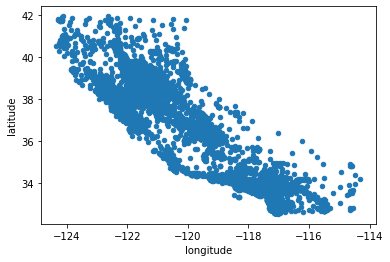

In [62]:
# Now lets visualize our data to gain more insight 
housing.plot(kind='scatter', x='longitude', y='latitude')

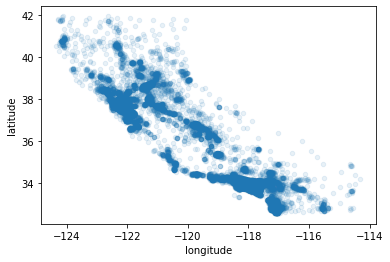

In [63]:
housing.plot(kind='scatter', alpha=0.1, x='longitude', y='latitude')

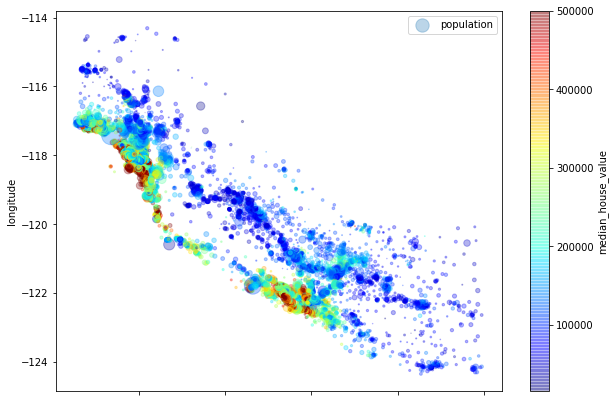

In [67]:
# We can see high density areas between coordinates 46-40/123-121
# Now lets look at the housing prices, where radius of circles represent the districts population (s),
# and color represents the price (c). We can use predefined color maps (cmap = (in this case) 'jet') to represent the range 
# of prices

housing.plot(kind='scatter', x='latitude', y='longitude', alpha =0.3, 
            s=housing['population']/100, label='population', c='median_house_value', 
            cmap=plt.get_cmap('jet'), colorbar=True, figsize= (10, 7)
            )
plt.legend()
plt.show()
# Prices are generally high near the coastal areas, may also create clusters later on

In [68]:
# Now, we can start looking for correlations between the numerical attributes

corr_matrix = st_train.corr()
# and then look for correlations with the target variable
corr_matrix['median_house_value'].sort_values(ascending=False)

# We can see that median income has maximum positive correlation with house value, so richer districts have costlier houses 
# owned by richer people 

# There is also a slight negative correlation between latitude and house value, which can be visualized (kinda)by the plot above

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
ocean_proximity       0.017577
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EAB31AE240>,
      dtype=object)

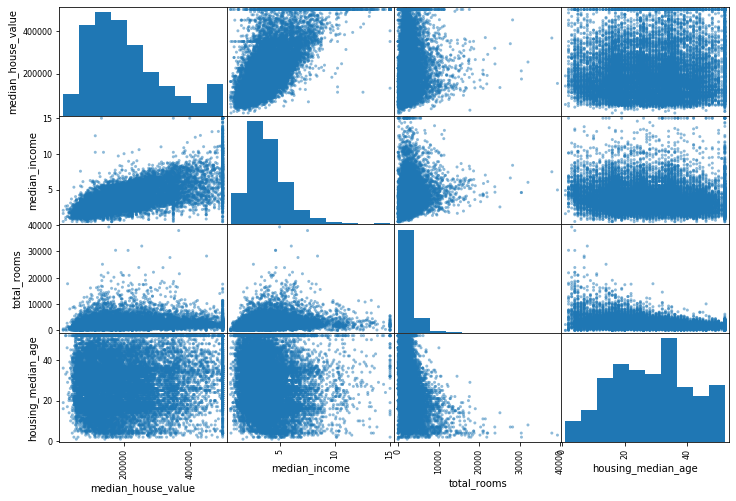

In [73]:
# However, we should also keep in mu=ind that these are only linear correlations... 

# We can also use the scatter_matrix function to visualize correlations between numerical variables (all against all)
# Lets do that for some promising features (top 4 from our corr_matrix)
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(st_train[attributes], figsize=(12, 8), alpha=0.5)

# Diagonal is a histogram of each attribute 

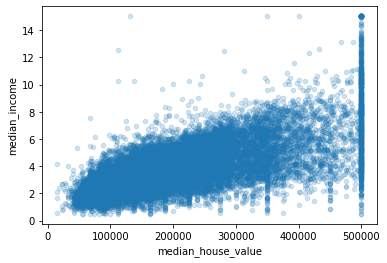

In [74]:
# We can observe some linear as well as some logarithmic (right dispersed) - for later transormation - relationships
# between the attributes 
# Log rel. are - Median-Age/Median_House_value, median_income/median_age
# Linear - median_house_value/ median_income

housing.plot(kind='scatter', x='median_house_value', y='median_income', alpha=0.2)
# The line at 500000 is due to a number of capped values above the value. However, notice that there are similar lies at
# 450k ,350k, etc

In [79]:
# Now for some feature engineering 

# Since the total number of rooms isnt that useful, we might engineer that attribute to represent rooms per household. 
# Similarly, we can convert total bedrooms to bedrooms per household and for population to population per household.

housing = st_train.copy()
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [80]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [81]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)
# We now notice a new negative correlation of bedrooms per room (bedroom:room ratio) to median_house_value
# This means that houses with more bedrooms cost more

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
ocean_proximity             0.017577
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

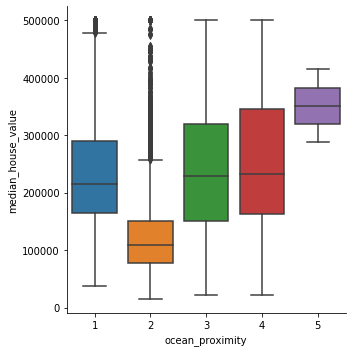

In [85]:
import seaborn as sb 

# Categorical plotting to see if ocean_proximity affects house_median_value
sb.catplot(x='ocean_proximity', y='median_house_value', kind='box', data=housing)

# Significant differnces in house values prove that 'ocean_proximity' will have some prediction in the outcome, 
# however, the number of outliers for 'INLAND' housing should be noted. May be some of the richer houses...

In [92]:
# Now for some data cleaning

from sklearn.preprocessing import Imputer
# Imputer class helps generate median values for all numerical attributes in the dataframe 

imputer = Imputer(strategy='median')

# Now fit the instance to our training data 
imputer.fit(housing)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [93]:
# Imputer stores the median values of all attributes in the statistics_ instance variable. Only one attribute had missing 
# values, but since we cannot be sure that there wont be any missing values in new data coming in the future, it is good 
# practice to apply imputer to all numerical attributes 
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        1.79500000e+05,  2.00000000e+00,  5.23228423e+00,  2.03031374e-01,
        2.81765270e+00])

In [96]:
housing.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        1.79500000e+05,  2.00000000e+00,  5.23228423e+00,  2.03031374e-01,
        2.81765270e+00])